# UNIST IE30301 Data Mining
## Final Project
### Tsoy Roman ID:20202040

Hypothesis:In the United States, the number of men and women who have annual income >50K is the highest, when the relationship status of man - husband,and woman-wife.

In [191]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Loading data

In [192]:
# Load Data to df
df = pd.read_csv('classification_project.csv')

In [193]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [194]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [195]:
df.columns.map(lambda x: re.sub(' ','',x))

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [196]:
import re
df.columns = df.columns.map(lambda x: re.sub(' ','',x))
df.rename(columns = {'native-country': 'country'}, inplace = True)

In [197]:
nom = ['workclass','education','marital-status','occupation','relationship','race','sex','country','income']

In [198]:
df[nom]

,workclass,education,marital-status,occupation,relationship,race,sex,country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [199]:
df[nom] = df[nom].applymap(lambda x: re.sub(' ','',x))

Handling data

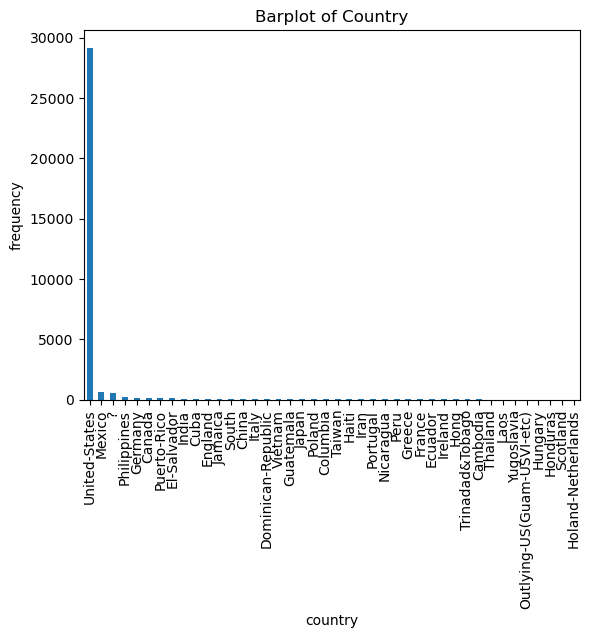

In [200]:
df['country'].value_counts().plot(kind='bar') #mydat['age'].value_counts() counts the value and them plot it
plt.title('Barplot of Country')
plt.xlabel('country')
plt.ylabel('frequency')
plt.show()

In [201]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [202]:
#Making dataset only with values for which, country is United-States
df = df[df['country'] == 'United-States']

In [203]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29170 non-null  int64 
 1   workclass       29170 non-null  object
 2   fnlwgt          29170 non-null  int64 
 3   education       29170 non-null  object
 4   education-num   29170 non-null  int64 
 5   marital-status  29170 non-null  object
 6   occupation      29170 non-null  object
 7   relationship    29170 non-null  object
 8   race            29170 non-null  object
 9   sex             29170 non-null  object
 10  capital-gain    29170 non-null  int64 
 11  capital-loss    29170 non-null  int64 
 12  hours-per-week  29170 non-null  int64 
 13  country         29170 non-null  object
 14  income          29170 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.6+ MB


In [205]:
df['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
5        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 29170, dtype: object

In [206]:
df['income'].value_counts()

<=50K    21999
>50K      7171
Name: income, dtype: int64

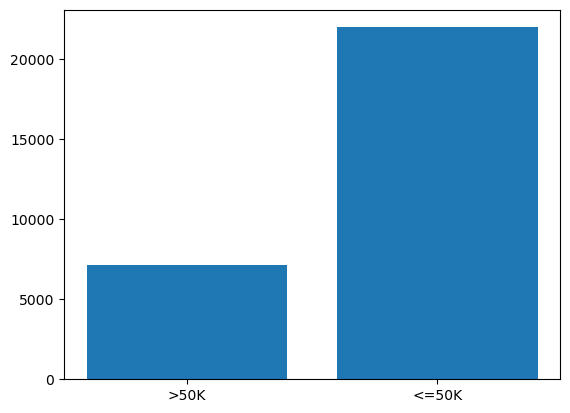

In [207]:
plt.bar(['>50K', '<=50K'], df['income'].value_counts(ascending=True))
plt.show()

In [208]:
# Checking imbalance ratio
ratio = len(df[df['income'] == '<=50K']) / len(df[df['income'] == '>50K'])
print(f'Ratio between >50K : <=50K = 1:{ratio:.4f}')

Ratio between >50K : <=50K = 1:3.0678


Checking a categorical feature using `value_counts()` method

In [210]:
# Save all the categorical columns and store in a list called cat_feat
cat_feat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

In [211]:
for cat in cat_feat:
    print(f'[INFO] Feature {cat}')
    print(df[cat].value_counts())
    print('\n')

[INFO] Feature workclass
Private             20135
Self-emp-not-inc     2313
Local-gov            1956
?                    1659
State-gov            1210
Self-emp-inc          991
Federal-gov           886
Without-pay            13
Never-worked            7
Name: workclass, dtype: int64


[INFO] Feature education
HS-grad         9702
Some-college    6740
Bachelors       4766
Masters         1527
Assoc-voc       1289
11th            1067
Assoc-acdm       982
10th             848
Prof-school      502
7th-8th          499
9th              395
12th             365
Doctorate        328
5th-6th           97
1st-4th           46
Preschool         17
Name: education, dtype: int64


[INFO] Feature marital-status
Married-civ-spouse       13368
Never-married             9579
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: marital-status, dtype: int64


[INFO] Feature occupation
Exec-m

EDA, analyzing data by drawing charts and tables, related to hypothesis

In [212]:
df.groupby(['sex', 'relationship'])['income'].value_counts()

#it shows one inconsistent data

sex     relationship    income
Female  Husband         <=50K        1
        Not-in-family   <=50K     3304
                        >50K       268
        Other-relative  <=50K      307
                        >50K        10
        Own-child       <=50K     2056
                        >50K        23
        Unmarried       <=50K     2252
                        >50K       101
        Wife            <=50K      690
                        >50K       670
Male    Husband         <=50K     6435
                        >50K      5425
        Not-in-family   <=50K     3431
                        >50K       525
        Other-relative  <=50K      362
                        >50K        17
        Own-child       <=50K     2576
                        >50K        36
        Unmarried       <=50K      585
                        >50K        95
        Wife            >50K         1
Name: income, dtype: int64

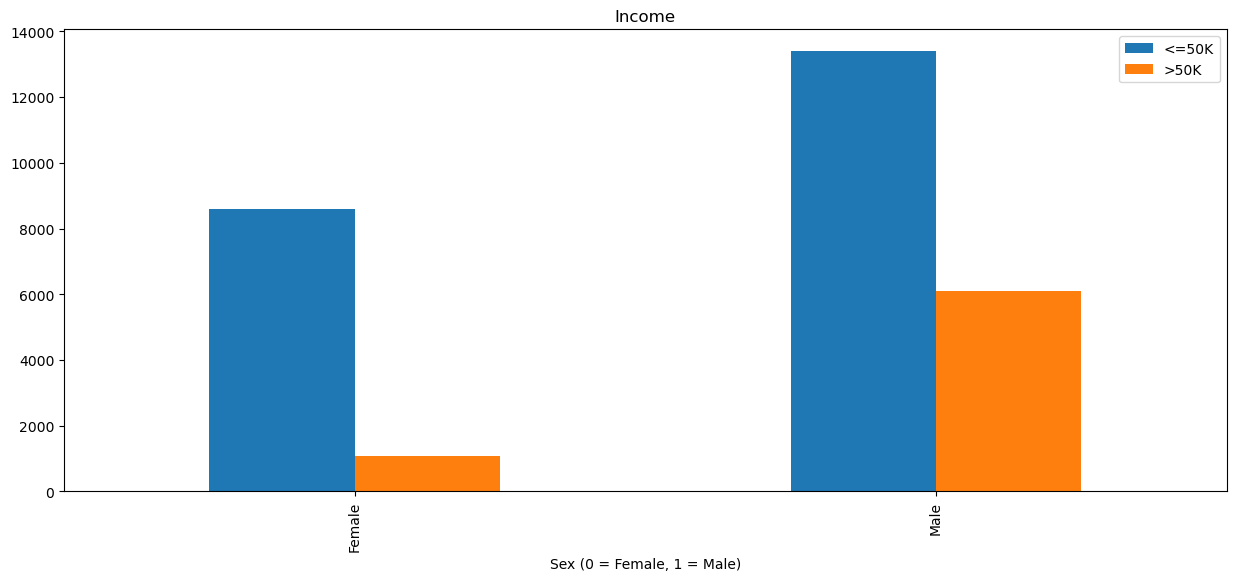

In [213]:
pd.crosstab(df['sex'], df['income']=='>50K').plot(kind='bar', figsize=(15, 6))
plt.title('Income')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(['<=50K', '>50K'])
plt.show()



In [214]:
#Creating dataset with income >50K
df1=df[df['income']=='>50K']

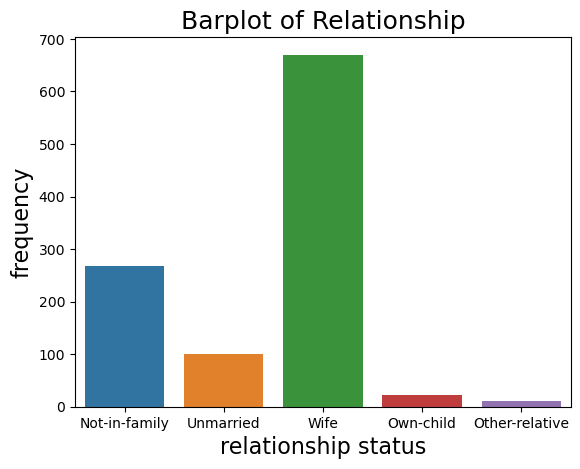

In [215]:
sns.countplot(data=df1[df1['sex']=='Female'],x="relationship")
plt.title('Barplot of Relationship', fontsize=18) #we can specify the title
plt.xlabel('relationship status', fontsize=16)  #we can name x-axis
plt.ylabel('frequency', fontsize=16) #we can name y-axis
plt.show()

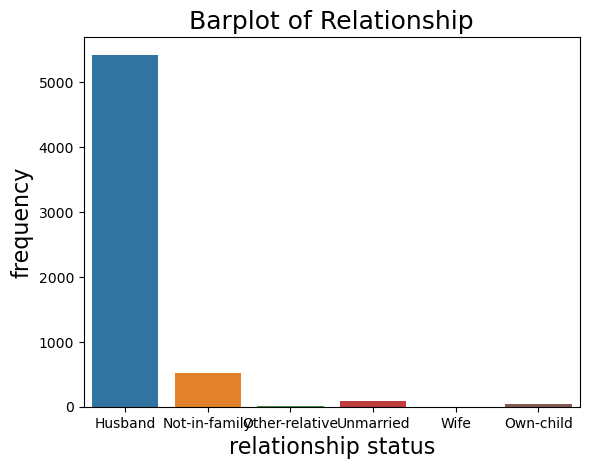

In [216]:
sns.countplot(data=df1[df1['sex']=='Male'],x="relationship")
plt.title('Barplot of Relationship', fontsize=18) #we can specify the title
plt.xlabel('relationship status', fontsize=16)  #we can name x-axis
plt.ylabel('frequency', fontsize=16) #we can name y-axis
plt.show()

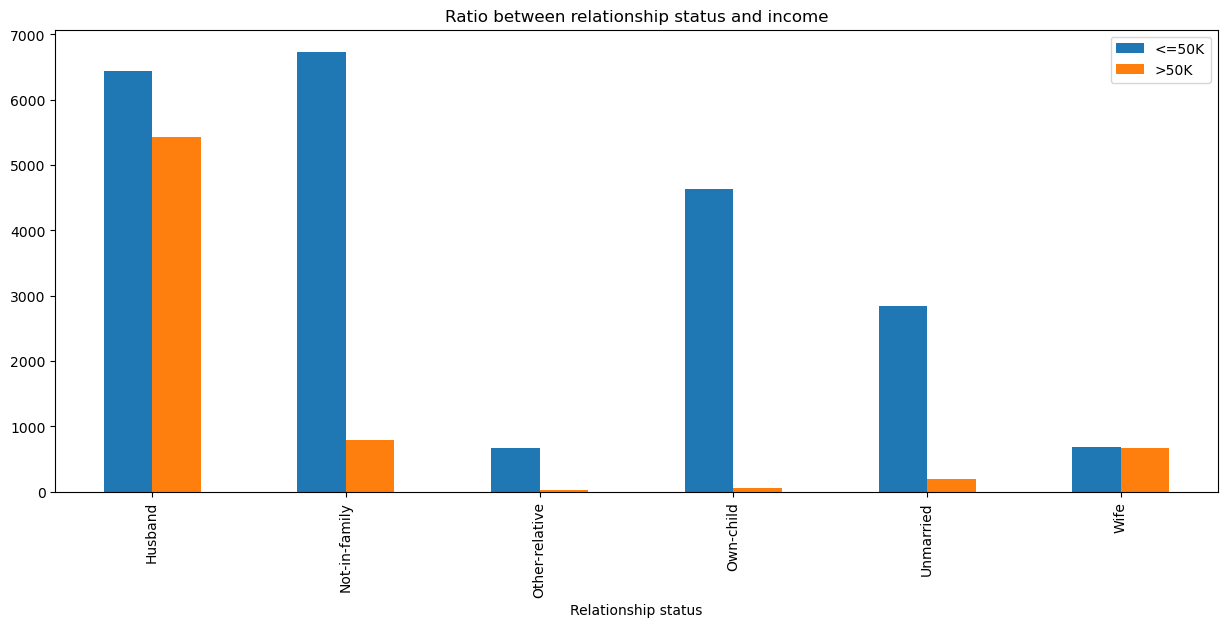

In [217]:
pd.crosstab(df['relationship'], df['income']).plot(kind='bar', figsize=(15, 6))
plt.title('Ratio between relationship status and income')
plt.xlabel('Relationship status')
plt.legend(['<=50K', '>50K'])
plt.show()

## Data preprocessing

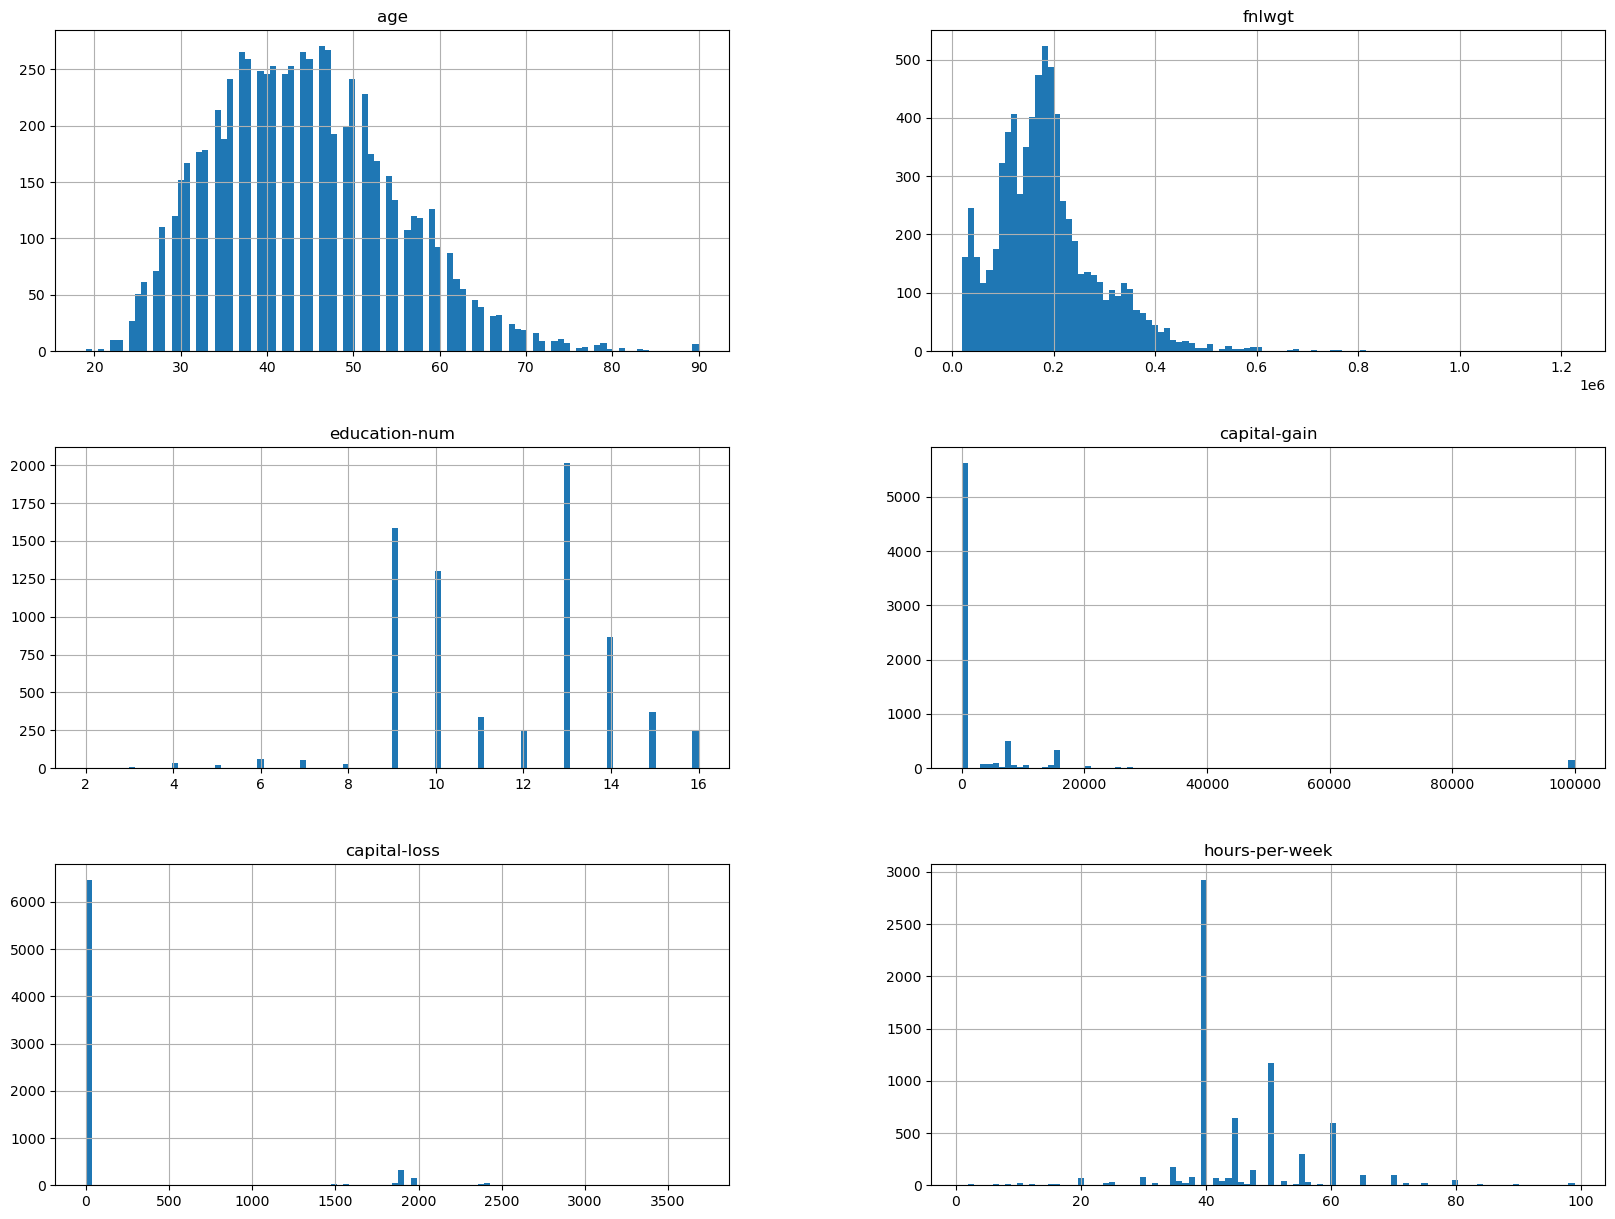

In [218]:
df[df['income'] == '>50K'].hist(bins=100, figsize=(20, 15))
plt.show()

<AxesSubplot:>

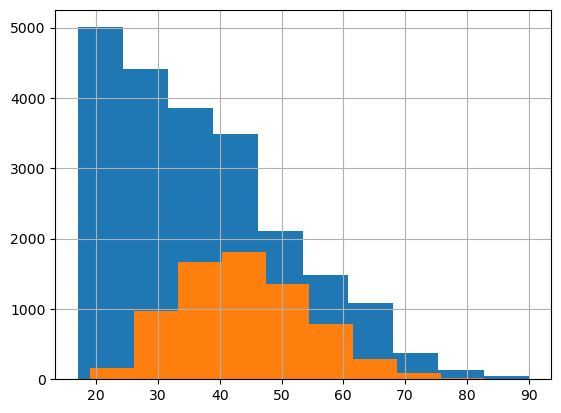

In [219]:
df[df['income'] == '<=50K']['age'].hist()
df[df['income'] == '>50K']['age'].hist()

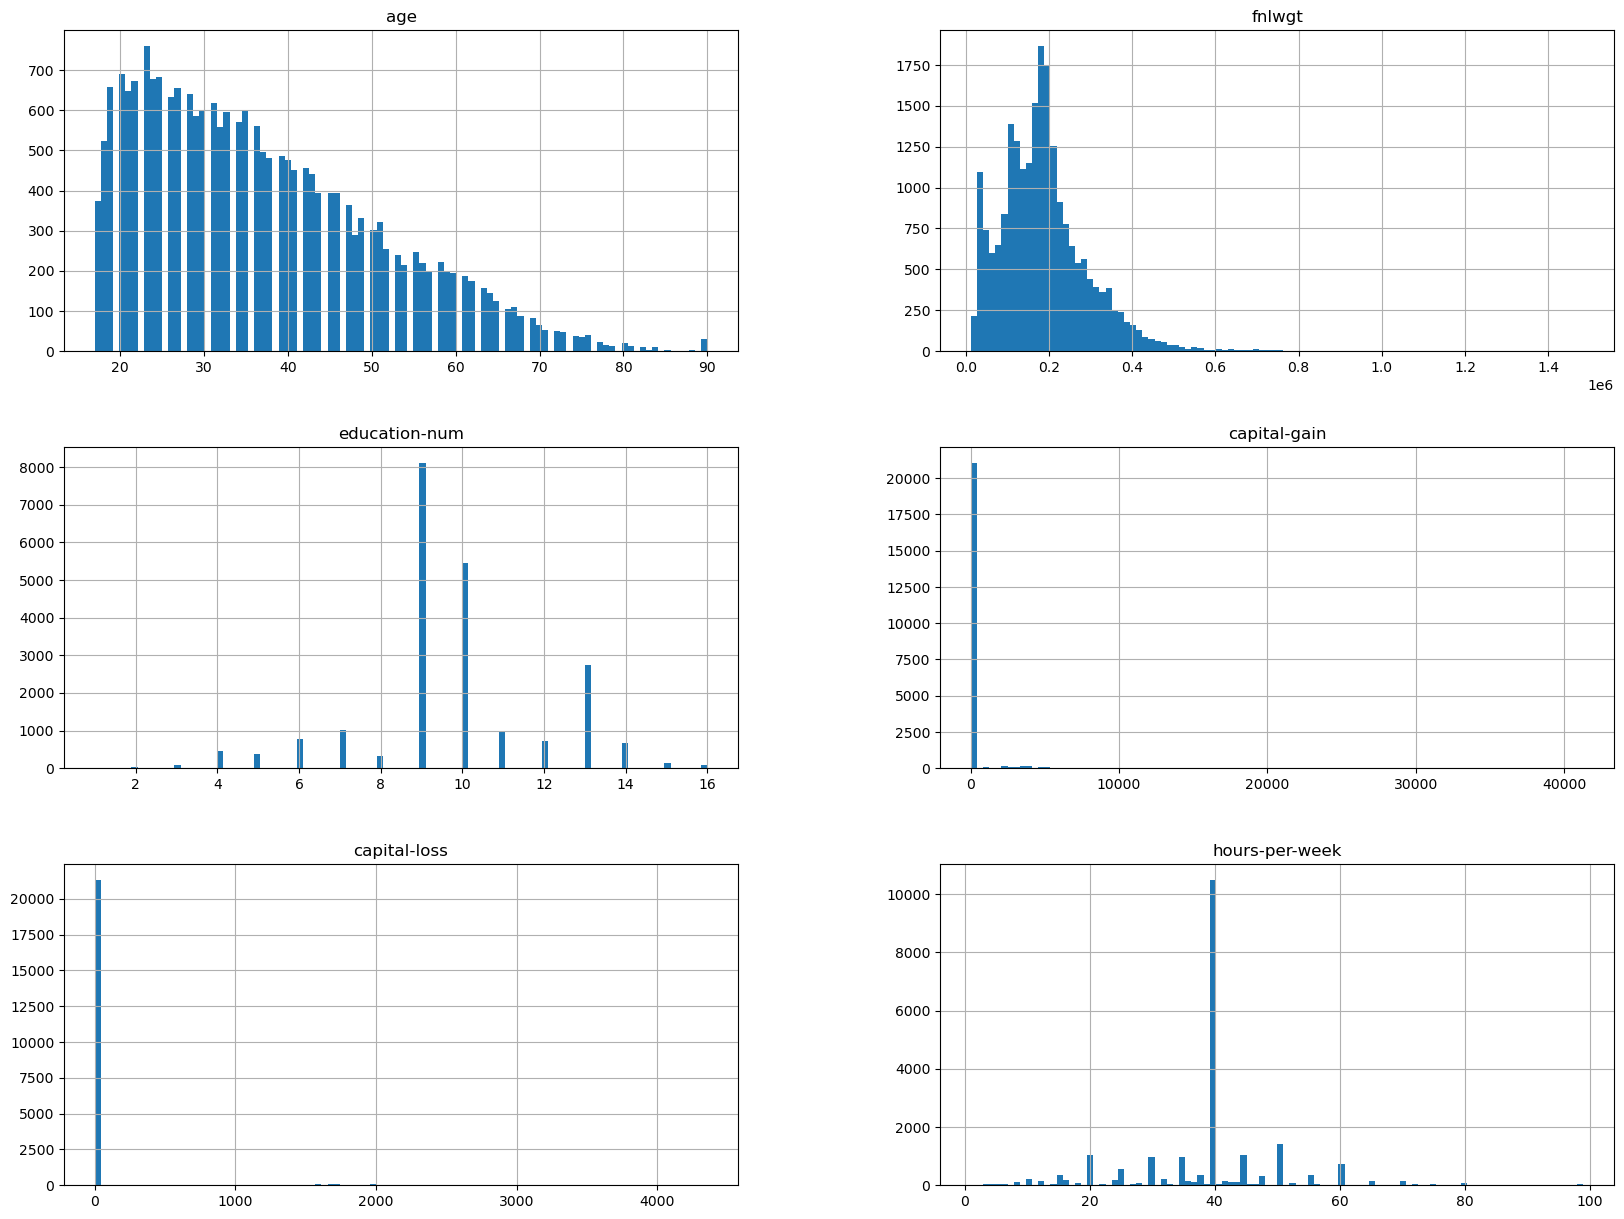

In [220]:
df[df['income'] == '<=50K'].hist(bins=100, figsize=(20, 15))
plt.show()

Studying the domain, I came to conlusion that capital gain and capital loss have to be included in annual come, so we do not drop these values.

Capital gain and capital loss mean the same, but with different sign, so we substract them and assing it to capital gain variable to reduce the dimensions and avoid multicollinearity problem

In [221]:
df['capital-gain']=df['capital-gain']-df['capital-loss']

In [222]:
df['capital-gain'].value_counts()

 0        25320
 15024      320
 7688       261
 7298       228
-1902       183
          ...  
 1639         1
 41310        1
 4931         1
 7978         1
-1844         1
Name: capital-gain, Length: 207, dtype: int64

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29170 non-null  int64 
 1   workclass       29170 non-null  object
 2   fnlwgt          29170 non-null  int64 
 3   education       29170 non-null  object
 4   education-num   29170 non-null  int64 
 5   marital-status  29170 non-null  object
 6   occupation      29170 non-null  object
 7   relationship    29170 non-null  object
 8   race            29170 non-null  object
 9   sex             29170 non-null  object
 10  capital-gain    29170 non-null  int64 
 11  capital-loss    29170 non-null  int64 
 12  hours-per-week  29170 non-null  int64 
 13  country         29170 non-null  object
 14  income          29170 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.6+ MB


In [224]:
df = df.drop(['capital-loss'], axis=1)

In [225]:
df.info() #checking if the above column was dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29170 non-null  int64 
 1   workclass       29170 non-null  object
 2   fnlwgt          29170 non-null  int64 
 3   education       29170 non-null  object
 4   education-num   29170 non-null  int64 
 5   marital-status  29170 non-null  object
 6   occupation      29170 non-null  object
 7   relationship    29170 non-null  object
 8   race            29170 non-null  object
 9   sex             29170 non-null  object
 10  capital-gain    29170 non-null  int64 
 11  hours-per-week  29170 non-null  int64 
 12  country         29170 non-null  object
 13  income          29170 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


In [226]:
# As for all rows country is United States, we just drop this column
df = df.drop(['country'], axis=1)

Also, one of the variables either education num or education should be removed to have less dimensions and avoid multicollinearity.

In [227]:
pd.concat([df['education-num'].value_counts() , df['education'].value_counts()], axis=0)

9               9702
10              6740
13              4766
14              1527
11              1289
7               1067
12               982
6                848
15               502
4                499
5                395
8                365
16               328
3                 97
2                 46
1                 17
HS-grad         9702
Some-college    6740
Bachelors       4766
Masters         1527
Assoc-voc       1289
11th            1067
Assoc-acdm       982
10th             848
Prof-school      502
7th-8th          499
9th              395
12th             365
Doctorate        328
5th-6th           97
1st-4th           46
Preschool         17
dtype: int64

In [228]:
df = df.drop(['education'], axis=1)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29170 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29170 non-null  int64 
 1   workclass       29170 non-null  object
 2   fnlwgt          29170 non-null  int64 
 3   education-num   29170 non-null  int64 
 4   marital-status  29170 non-null  object
 5   occupation      29170 non-null  object
 6   relationship    29170 non-null  object
 7   race            29170 non-null  object
 8   sex             29170 non-null  object
 9   capital-gain    29170 non-null  int64 
 10  hours-per-week  29170 non-null  int64 
 11  income          29170 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.9+ MB


## Removing irrelevant rows

In [230]:
df[df['sex']=='Male'][df['relationship']=='Wife']

/var/folders/19/knq7dlss0pl6xn7b65qh4qnw0000gn/T/ipykernel_30042/876109157.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['sex']=='Male'][df['relationship']=='Wife']


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,income
575,29,Private,350162,13,Married-civ-spouse,Exec-managerial,Wife,White,Male,0,40,>50K


In [231]:
df=df.drop(575)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29169 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29169 non-null  int64 
 1   workclass       29169 non-null  object
 2   fnlwgt          29169 non-null  int64 
 3   education-num   29169 non-null  int64 
 4   marital-status  29169 non-null  object
 5   occupation      29169 non-null  object
 6   relationship    29169 non-null  object
 7   race            29169 non-null  object
 8   sex             29169 non-null  object
 9   capital-gain    29169 non-null  int64 
 10  hours-per-week  29169 non-null  int64 
 11  income          29169 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.9+ MB


## Missing data

In [233]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Number of missing values', '%'])
missing_data.head(11)

,Number of missing values,%
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0
capital-gain,0,0.0


In [234]:
df=df.replace('?', np.nan)

Numeric variables

In [235]:
df.loc[df["age"].isnull(), "age"]=round(df["age"].mean(),0)

In [236]:
df.loc[df["hours-per-week"].isnull(), "hours-per-week"]=round(df["hours-per-week"].mean(),0)

In [237]:
df.loc[df["capital-gain"].isnull(), "capital-gain"]=round(df["capital-gain"].mean(),0)

In [238]:
df.loc[df["fnlwgt"].isnull(), "fnlwgt"]=round(df["fnlwgt"].mean(),0)

In [239]:
df.loc[df["education-num"].isnull(), "education-num"]=round(df["education-num"].mean(),0)

Categorical variables

In [240]:
cat_feat = ['workclass','marital-status', 'occupation', 'relationship', 'race', 'sex']

In [241]:
def miss_value(dataframe,colname):
     mode=dataframe[colname].mode()[0]
     dataframe[colname].fillna(mode,inplace=True)


In [242]:
for columns in cat_feat:
    miss_value(df,columns)

In [243]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,20,<=50K


In [244]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Number of missing values', '%'])
missing_data.head(11)

,Number of missing values,%
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0
capital-gain,0,0.0


Checking for duplicates

In [245]:
feat = ['workclass','marital-status', 'occupation', 'relationship', 'race', 'sex','age','hours-per-week','capital-gain','education-num','fnlwgt']

In [246]:
df.drop_duplicates(subset =feat,
                     keep = 'first', inplace = True)
 

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29149 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29149 non-null  int64 
 1   workclass       29149 non-null  object
 2   fnlwgt          29149 non-null  int64 
 3   education-num   29149 non-null  int64 
 4   marital-status  29149 non-null  object
 5   occupation      29149 non-null  object
 6   relationship    29149 non-null  object
 7   race            29149 non-null  object
 8   sex             29149 non-null  object
 9   capital-gain    29149 non-null  int64 
 10  hours-per-week  29149 non-null  int64 
 11  income          29149 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.9+ MB


In [248]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,20,<=50K


Train test split

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
training_set, test_set = train_test_split(df, test_size=0.2, random_state=1, stratify=df[['income']])

In [251]:
ratio = len(training_set[training_set['income'] == '<=50K']) / len(training_set[training_set['income'] =='>50K'])
print(f'Ratio of income in training set >50K : <=50K = 1:{ratio:.4f}')

Ratio of income in training set >50K : <=50K = 1:3.0675


In [252]:
ratio = len(test_set[test_set['income'] == '<=50K']) / len(test_set[test_set['income'] == '>50K'])
print(f'Ratio of income in testing set >50K : <=50K = 1:{ratio:.4f}')

Ratio of income in testing set >50K : <=50K = 1:3.0684


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29149 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29149 non-null  int64 
 1   workclass       29149 non-null  object
 2   fnlwgt          29149 non-null  int64 
 3   education-num   29149 non-null  int64 
 4   marital-status  29149 non-null  object
 5   occupation      29149 non-null  object
 6   relationship    29149 non-null  object
 7   race            29149 non-null  object
 8   sex             29149 non-null  object
 9   capital-gain    29149 non-null  int64 
 10  hours-per-week  29149 non-null  int64 
 11  income          29149 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.9+ MB


In [254]:
# let us first separate numerical and categorical(nominal/ordinal) columns

nom_feat = ['workclass','marital-status', 'occupation', 'relationship', 'race', 'sex']
ord_feat = ['education-num']
num_feat = ['age', 'hours-per-week', 'capital-gain', 'fnlwgt']

In [255]:
# copy data for preventing damage in raw training data
data = training_set.copy()
data1=test_set.copy()

In [256]:
X_train = data.iloc[:,:-1]
y_train = data.iloc[:,-1]
X_test = data1.iloc[:,:-1]
y_test = data1.iloc[:,-1]

One-hot encoding and ordinal encoding

In [257]:
# import OneHotEncoder and OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [258]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(X_train[nom_feat].values)
X_train_nom = ohe.transform(X_train[nom_feat].values)
X_test_nom=ohe.transform(X_test[nom_feat].values)
X_train_ord=X_train[ord_feat].values
X_test_ord=X_test[ord_feat].values

In [259]:
X_train_ord

array([[13],
       [14],
       [ 9],
       ...,
       [11],
       [10],
       [ 9]])

In [260]:
X_test_nom

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

Feature scaling

In [261]:
# import scaler
from sklearn.preprocessing import StandardScaler

In [262]:
scalar = StandardScaler()
scalar.fit(X_train[num_feat].values)
X_train_num = scalar.transform(X_train[num_feat].values)
X_test_num=scalar.transform(X_test[num_feat].values)

In [263]:
X_train = np.concatenate([X_train_num, X_train_ord, X_train_nom], axis=1)
X_test= np.concatenate([X_test_num, X_test_ord, X_test_nom], axis=1)

In [264]:
X_test.shape

(5830, 47)

In [265]:
X_train.shape

(23319, 47)

## Training models

Logistic Regression

In [266]:
from sklearn.linear_model import LogisticRegression
log_reg_cw = LogisticRegression(class_weight='balanced',max_iter=800)
log_reg_cw.fit(X_train, y_train)
accuracy_logreg=log_reg_cw.score(X_train, y_train)

In [267]:
accuracy_logreg

0.7977185985676916

In [268]:
y_test

24266    <=50K
8038     <=50K
27126    <=50K
20311     >50K
23122    <=50K
         ...  
11845    <=50K
20354    <=50K
2241     <=50K
20864     >50K
6093     <=50K
Name: income, Length: 5830, dtype: object

In [269]:
y_pred = log_reg_cw.predict(X_test)
y_pred

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

Decision Tree

In [270]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(random_state=0,class_weight='balanced')
dectree.fit(X_train, y_train)
accuracy_dectree=dectree.score(X_train, y_train)

In [271]:
accuracy_dectree

1.0

In [272]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(random_state=0,class_weight='balanced',max_depth=10)
dectree.fit(X_train, y_train)
accuracy_dectree=dectree.score(X_train, y_train)

In [273]:
accuracy_dectree

0.8290664265191475

Random forest

In [274]:
 from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0,class_weight='balanced',max_depth=10)
randfor.fit(X_train,y_train)
accuracy_randfor=randfor.score(X_train, y_train)

In [275]:
accuracy_randfor

0.8043655388309962

Support Vector Machine

In [276]:
from sklearn import svm
suppvm = svm.SVC(kernel='poly',class_weight='balanced')
suppvm.fit(X_train, y_train)
accuracy_suppvm=suppvm.score(X_train, y_train)

In [277]:
accuracy_suppvm

0.8003344911874437

In [278]:
suppvm1 = svm.SVC(kernel='rbf',class_weight='balanced')
suppvm1.fit(X_train, y_train)
accuracy_suppvm1=suppvm1.score(X_train, y_train)

In [279]:
accuracy_suppvm1

0.7798361850851238

k-NN

In [280]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15,weights='distance') 
knn.fit(X_train, y_train) 
accuracy_knn=knn.score(X_train,y_train)

## Evaluation

10-fold Cross-validation

In [281]:
from sklearn.model_selection import cross_val_score
def validation(model, x, y):
    scores = cross_val_score(model, x, y, cv=10)
    return scores.mean()

In [282]:
val_logreg=validation(log_reg_cw,X_train,y_train)

In [283]:
val_dectree=validation(dectree, X_train, y_train)

In [284]:
val_randfor=validation(randfor, X_train, y_train)

In [285]:
val_suppvm=validation(suppvm, X_train, y_train)

In [286]:
val_suppvm1=validation(suppvm1, X_train, y_train)

In [287]:
val_knn=validation(knn, X_train, y_train)

In [288]:
evaluation = pd.DataFrame({'Model': ['Logistic regression', 'Decision tree', 'Random Forest',
              'SVM(poly)','SVM(rbf)', 'k-NN'],
                           'Accuracy Score on training set': [accuracy_logreg, 
              accuracy_dectree,accuracy_randfor, 
              accuracy_suppvm,accuracy_suppvm1, accuracy_knn],
                           'Accuracy using 10-fold cross validation': [val_logreg, 
              val_dectree,val_randfor, 
              val_suppvm,val_suppvm1, val_knn]})
evaluation = evaluation.set_index('Model')

In [289]:
evaluation

,Accuracy Score on training set,Accuracy using 10-fold cross validation
Model,,
Logistic regression,0.797719,0.797204
Decision tree,0.829066,0.795574
Random Forest,0.804366,0.790557
SVM(poly),0.800334,0.799005
SVM(rbf),0.779836,0.776706
k-NN,1.000000,0.835627


ROC-AUC curve

In [290]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, precision_recall_fscore_support,\
roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [291]:
log_reg_cw.predict_proba(X_test)[:, 1]

array([0.16799821, 0.86317739, 0.06926885, ..., 0.23685992, 0.78521297,
       0.16342413])

In [333]:
log_reg_cw.predict(X_test)

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [293]:
#Logistic Regression
y_proba= log_reg_cw.predict_proba(X_test)[:, 1]
roc_auc_logreg=roc_auc_score(y_test, y_proba)
#Decision tree
y_proba1=dectree.predict_proba(X_test)[:, 1]
roc_auc_logreg1=roc_auc_score(y_test, y_proba1)
#Random Forest
y_proba2=randfor.predict_proba(X_test)[:, 1]
roc_auc_logreg2=roc_auc_score(y_test, y_proba2)
#k-NN
y_proba4=knn.predict_proba(X_test)[:, 1]
roc_auc_logreg4=roc_auc_score(y_test, y_proba4)

In [294]:
from sklearn.metrics import auc, roc_curve
#Logistic Regression
fpr, tpr, threshold = roc_curve(y_test, y_proba,pos_label='>50K')
rocauc = auc(fpr, tpr)
#Decision Tree
fpr1,tpr1,threshold1= roc_curve(y_test,y_proba1,pos_label='>50K')
rocauc1 = auc(fpr1, tpr1)
#Random Forest
fpr2,tpr2,threshold2= roc_curve(y_test,y_proba2,pos_label='>50K')
rocauc2 = auc(fpr2, tpr2)
#k-NN
fpr4,tpr4,threshold4= roc_curve(y_test,y_proba4,pos_label='>50K')
rocauc4 = auc(fpr4, tpr4)

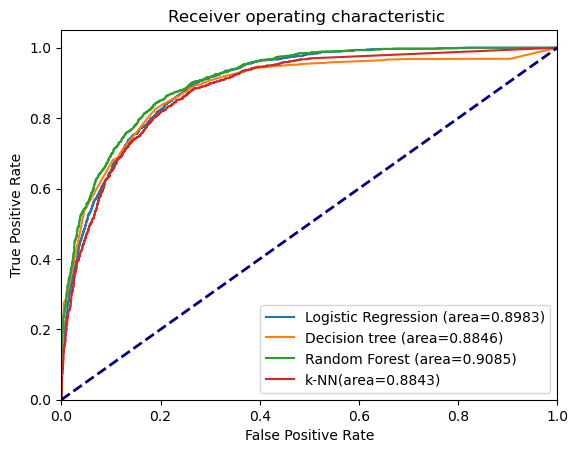

In [295]:
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (area={rocauc:.4f})')
plt.plot(fpr1, tpr1, label=f'Decision tree (area={rocauc1:.4f})')
plt.plot(fpr2, tpr2, label=f'Random Forest (area={rocauc2:.4f})')
plt.plot(fpr4, tpr4, label=f'k-NN(area={rocauc4:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

In [296]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
f1_scorer = make_scorer(f1_score, pos_label=">50K")

lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights 
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = [{'class_weight': [{'<=50K':x, '>50K':1.0-x} for x in weights]}]

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(lr, 
                          param_grid= param_grid,  
                          scoring=f1_scorer, 
                          cv = 5) 
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'class_weight': {'<=50K': 0.32336683417085427, '>50K': 0.6766331658291458}}

In [297]:
accuracy_logreg

0.7977185985676916

In [298]:
gridsearch

GridSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'),
             param_grid=[{'class_weight': [{'<=50K': 0.0, '>50K': 1.0},
                                           {'<=50K': 0.004974874371859297,
                                            '>50K': 0.9950251256281407},
                                           {'<=50K': 0.009949748743718593,
                                            '>50K': 0.9900502512562814},
                                           {'<=50K': 0.014924623115577889,
                                            '>50K': 0.9850753768844221},
                                           {'<=50K': 0.019899497487437186,
                                            '>50K': 0.9801005025125629},
                                           {...
                                            '>50K': 0.8806030150753769},
                                           {'<=50K': 0.12437185929648241,
                                            '>50K': 0.8756281407035176},
                                           {'<=50K': 0.1293467336683417,
                                            '>50K': 0.8706532663316583},
                                           {'<=50K': 0.13432160804020102,
                                            '>50K': 0.865678391959799},
                                           {'<=50K': 0.1392964824120603,
                                            '>50K': 0.8607035175879397},
                                           {'<=50K': 0.1442713567839196,
                                            '>50K': 0.8557286432160804}, ...]}],
             scoring=make_scorer(f1_score, pos_label=>50K))

In [299]:
#Naive Bayes algorithm 

In [300]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
accuracy_nb=classifier.score(X_train, y_train)

In [301]:
accuracy_nb

0.6517432136884086

# Testing on Deep Learning model

In [334]:
X_train.shape[0]

23319

In [352]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(120, activation='relu', input_shape=[47]),
    layers.Dense(120, activation='relu'), 
    layers.Dense(120, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
])

In [353]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

In [354]:
keras.utils.set_random_seed(1)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [344]:
len(X_train)

23319

In [345]:
y_train = y_train.replace({'>50K':1.0,'<=50K':0.0})

In [348]:
y_train = y_train.T

In [358]:
X_train = X_train.T

In [359]:
len(X_train)

23319

In [360]:
model.fit(X_train, y_train,
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping]) # hide the output because we have so many epochs

Epoch 1/100
46/46 [==============================] - 2s 7ms/step - loss: 0.4476
Epoch 2/100
46/46 [==============================] - 0s 8ms/step - loss: 0.3321
Epoch 3/100
46/46 [==============================] - 0s 8ms/step - loss: 0.3271
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 0.3224
Epoch 5/100
46/46 [==============================] - 0s 7ms/step - loss: 0.3194
Epoch 6/100
46/46 [==============================] - 0s 8ms/step - loss: 0.3170
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 0.3156
Epoch 8/100
46/46 [==============================] - 0s 8ms/step - loss: 0.3136
Epoch 9/100
46/46 [==============================] - 0s 8ms/step - loss: 0.3162
Epoch 10/100
46/46 [==============================] - 0s 9ms/step - loss: 0.3110
Epoch 11/100
46/46 [==============================] - 0s 9ms/step - loss: 0.3071
Epoch 12/100
46/46 [==============================] - 0s 8ms/step - loss: 0.3080
Epoch 13/100
46/46 [=================

46/46 [==============================] - 0s 7ms/step - loss: 0.2791
Epoch 33/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2783
Epoch 34/100
46/46 [==============================] - 0s 7ms/step - loss: 0.2751
Epoch 35/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2782
Epoch 36/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2738
Epoch 37/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2725
Epoch 38/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2715
Epoch 39/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2709
Epoch 40/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2688
Epoch 41/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2680
Epoch 42/100
46/46 [==============================] - 1s 20ms/step - loss: 0.2711
Epoch 43/100
46/46 [==============================] - 1s 14ms/step - loss: 0.2678
Epoch 44/100
46/46 [===================

46/46 [==============================] - 0s 7ms/step - loss: 0.2485
Epoch 64/100
46/46 [==============================] - 0s 8ms/step - loss: 0.2449
Epoch 65/100
46/46 [==============================] - 1s 13ms/step - loss: 0.2460
Epoch 66/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2434
Epoch 67/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2419
Epoch 68/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2408
Epoch 69/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2414
Epoch 70/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2424
Epoch 71/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2439
Epoch 72/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2386
Epoch 73/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2378
Epoch 74/100
46/46 [==============================] - 0s 6ms/step - loss: 0.2365
Epoch 75/100
46/46 [====================

46/46 [==============================] - 1s 12ms/step - loss: 0.2185
Epoch 95/100
46/46 [==============================] - 0s 8ms/step - loss: 0.2177
Epoch 96/100
46/46 [==============================] - 0s 9ms/step - loss: 0.2205
Epoch 97/100
46/46 [==============================] - 0s 9ms/step - loss: 0.2165
Epoch 98/100
46/46 [==============================] - 1s 12ms/step - loss: 0.2164
Epoch 99/100
46/46 [==============================] - 1s 15ms/step - loss: 0.2197
Epoch 100/100
46/46 [==============================] - 0s 9ms/step - loss: 0.2176


In [361]:
model.predict(X_train)

729/729 [==============================] - 3s 4ms/step


array([[9.9999672e-01],
       [8.2814372e-01],
       [5.1504213e-01],
       ...,
       [6.3312403e-03],
       [2.6469484e-03],
       [5.4946087e-12]], dtype=float32)